In [230]:
import pandas as pd
import numpy as np

In [231]:
product_detail = pd.read_csv("../input-files/product_details.csv")
store_info = pd.read_csv("../input-files/store_info.csv")
supplier_info = pd.read_csv("../input-files/supplier_info.csv")
weather_data = pd.read_csv("../input-files/weather_data.csv")
weekly_sales = pd.read_csv("../input-files/weekly_sales.csv")

In [232]:
merged_data = pd.merge(product_detail, weekly_sales, on="Product_ID", how="inner").merge(
    store_info, on="Store_ID", how="inner"
).merge(supplier_info, on="Supplier_ID", how="inner").merge(
    weather_data, on=["Region", "Week_Number"], how="inner"
)

In [233]:
merged_data

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,...,Price,Region,Store_Size,Cold_Storage_Capacity,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,...,2.46,London,12000,3788,PremiumGoods Wholesale,3,48776,9.9,23.0,1
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,...,3.76,Midlands,5000,1086,PremiumGoods Wholesale,3,48776,7.4,32.1,0
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,...,3.81,North East,4000,998,PremiumGoods Wholesale,3,48776,6.4,32.4,0
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,...,1.09,Midlands,5000,1243,PremiumGoods Wholesale,3,48776,7.4,32.1,0
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,...,2.72,London,10000,3330,PremiumGoods Wholesale,3,48776,9.9,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,1047,Green Tea 40bags,Beverages,92,3,2024-W52,510,1368,1157.55,0,...,1.56,North East,3000,784,FarmDirect Suppliers Ltd.,2,71976,5.2,19.2,1
37436,1047,Green Tea 40bags,Beverages,92,3,2024-W52,511,940,1159.28,0,...,6.49,South West,3000,634,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1
37437,1047,Green Tea 40bags,Beverages,92,3,2024-W52,512,1458,662.90,0,...,4.86,South East,5000,1697,FarmDirect Suppliers Ltd.,2,71976,13.7,10.1,1
37438,1047,Green Tea 40bags,Beverages,92,3,2024-W52,513,1311,694.10,0,...,7.36,South West,4000,1322,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1


In [234]:
# Drop Identifiers
identifiers = ['Product_ID', 'Store_ID', 'Supplier_ID']
merged_data.drop(columns=identifiers, inplace=True, axis=1)

## Feature Selection

In [235]:
from sklearn.feature_selection import mutual_info_regression


In [236]:
data_mutual = merged_data.copy()

In [237]:
print(data_mutual.columns)

Index(['Product_Name', 'Product_Category', 'Shelf_Life_Days', 'Week_Number',
       'Units_Sold', 'Marketing_Spend', 'Discount_Percent', 'Wastage_Units',
       'Price', 'Region', 'Store_Size', 'Cold_Storage_Capacity',
       'Supplier_Name', 'Lead_Time_Days', 'Supply_Capacity', 'Avg_Temperature',
       'Rainfall', 'Holiday_Flag'],
      dtype='object')


In [238]:
target = data_mutual['Units_Sold']
X = data_mutual.drop(columns=['Units_Sold'], axis=1)

In [239]:
# convert WeekNumber into datetime format then to something appropriate for mutual_information_regression eg(20240101)
X['Week_Number'] = pd.to_datetime(X['Week_Number'].astype(str) + '-1', format='%G-W%V-%u')

# Convert to yyyymmdd integer format, e.g. 20240101
X['Week_Number'] = X['Week_Number'].dt.strftime('%Y%m%d').astype(int)


cat_cols = data_mutual.select_dtypes(include=['object']).columns.to_list()
cat_cols.remove("Week_Number")
for col in cat_cols:
    X[col] = pd.Categorical(X[col]).codes


In [240]:
X

,Product_Name,Product_Category,Shelf_Life_Days,Week_Number,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Region,Store_Size,Cold_Storage_Capacity,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag
0,46,0,4,20240101,670.37,0,718,2.46,0,12000,3788,6,3,48776,9.9,23.0,1
1,46,0,4,20240101,1280.28,0,282,3.76,1,5000,1086,6,3,48776,7.4,32.1,0
2,46,0,4,20240101,1509.55,0,455,3.81,2,4000,998,6,3,48776,6.4,32.4,0
3,46,0,4,20240101,1101.11,0,422,1.09,1,5000,1243,6,3,48776,7.4,32.1,0
4,46,0,4,20240101,1701.66,0,475,2.72,0,10000,3330,6,3,48776,9.9,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,25,1,92,20241223,1157.55,0,34,1.56,2,3000,784,1,2,71976,5.2,19.2,1
37436,25,1,92,20241223,1159.28,0,23,6.49,5,3000,634,1,2,71976,8.7,16.2,1
37437,25,1,92,20241223,662.90,0,36,4.86,4,5000,1697,1,2,71976,13.7,10.1,1
37438,25,1,92,20241223,694.10,0,32,7.36,5,4000,1322,1,2,71976,8.7,16.2,1


In [241]:
mi_scores = mutual_info_regression(X, target, random_state=42)

feature_importance = pd.DataFrame({
    "feature":  X.columns,
    "mi_scores": mi_scores
}).sort_values(by="mi_scores", ascending=False)

feature_importance

,feature,mi_scores
6,Wastage_Units,3.516303
1,Product_Category,0.333410
0,Product_Name,0.328921
2,Shelf_Life_Days,0.247019
7,Price,0.158909
10,Cold_Storage_Capacity,0.138576
8,Region,0.138502
9,Store_Size,0.136106
15,Rainfall,0.081719
14,Avg_Temperature,0.075515


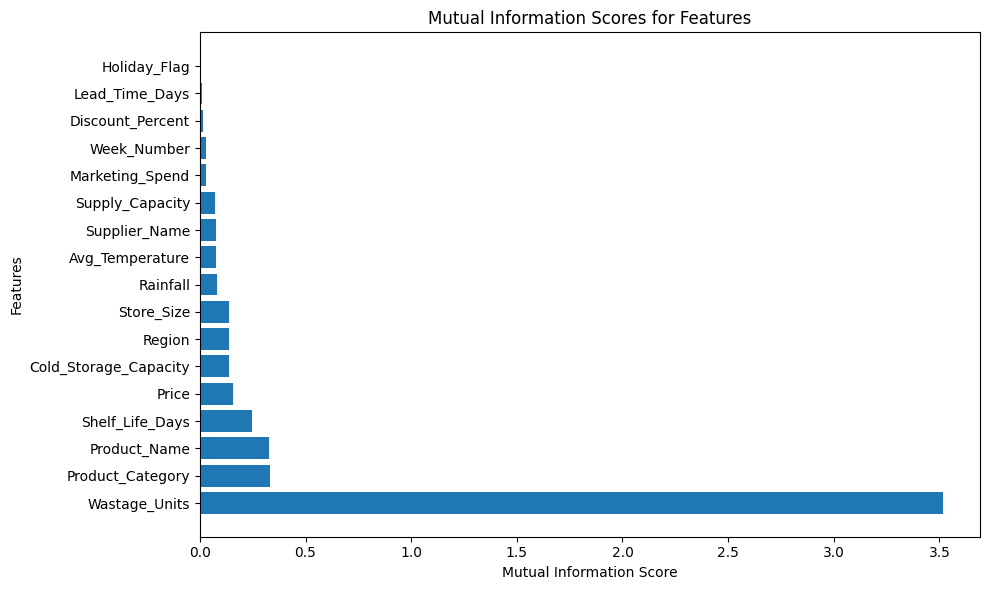

In [242]:
# plot mutual information scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["mi_scores"])
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Mutual Information Scores for Features")
plt.tight_layout()
plt.show()

In [243]:
training_features = feature_importance.head(10)['feature'].tolist()
training_features

['Wastage_Units',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature']

# Feature Encoding

In [244]:
print(merged_data[training_features].select_dtypes(include=['object']).nunique())

main_data = merged_data[training_features].copy()
merged_data[training_features].select_dtypes(include=['object'])

Product_Category     4
Product_Name        48
Region               6
dtype: int64


,Product_Category,Product_Name,Region
0,Bakery,Whole Wheat Bread 800g,London
1,Bakery,Whole Wheat Bread 800g,Midlands
2,Bakery,Whole Wheat Bread 800g,North East
3,Bakery,Whole Wheat Bread 800g,Midlands
4,Bakery,Whole Wheat Bread 800g,London
...,...,...,...
37435,Beverages,Green Tea 40bags,North East
37436,Beverages,Green Tea 40bags,South West
37437,Beverages,Green Tea 40bags,South East
37438,Beverages,Green Tea 40bags,South West


In [245]:
nominal_columns = ['Product_Category', 'Region']
high_cardinality_columns = ['Product_Name']

for col in nominal_columns:
    dummies = pd.get_dummies(main_data[col], prefix=col)
    dummies = dummies.astype(int)
    main_data = pd.concat([main_data, dummies], axis=1)
    main_data.drop(columns=[col], axis=1, inplace=True)

In [246]:
for col in high_cardinality_columns:
    target_mean = main_data.groupby(col)['Price'].mean()
    main_data[col] = main_data[col].map(target_mean)

In [247]:
main_data.dtypes

Wastage_Units                   int64
Product_Name                  float64
Shelf_Life_Days                 int64
Price                         float64
Cold_Storage_Capacity           int64
Store_Size                      int64
Rainfall                      float64
Avg_Temperature               float64
Product_Category_Bakery         int64
Product_Category_Beverages      int64
Product_Category_Dairy          int64
Product_Category_Meat           int64
Region_London                   int64
Region_Midlands                 int64
Region_North East               int64
Region_North West               int64
Region_South East               int64
Region_South West               int64
dtype: object

In [248]:
main_data['Units_Sold'] = merged_data['Units_Sold'].values

In [250]:
main_data['Week_Number'] = merged_data['Week_Number'].values

# convert WeekNumber into datetime format then to something appropriate for mutual_information_regression eg(20240101)
main_data['Week_Number'] = pd.to_datetime(main_data['Week_Number'].astype(str) + '-1', format='%G-W%V-%u')

# Convert to yyyymmdd integer format, e.g. 20240101
main_data['Week_Number'] = main_data['Week_Number'].dt.strftime('%Y%m%d').astype(int)
main_data.dtypes

Wastage_Units                   int64
Product_Name                  float64
Shelf_Life_Days                 int64
Price                         float64
Cold_Storage_Capacity           int64
Store_Size                      int64
Rainfall                      float64
Avg_Temperature               float64
Product_Category_Bakery         int64
Product_Category_Beverages      int64
Product_Category_Dairy          int64
Product_Category_Meat           int64
Region_London                   int64
Region_Midlands                 int64
Region_North East               int64
Region_North West               int64
Region_South East               int64
Region_South West               int64
Units_Sold                      int64
Week_Number                     int64
dtype: object

In [256]:
main_data.columns

Index(['Wastage_Units', 'Product_Name', 'Shelf_Life_Days', 'Price',
       'Cold_Storage_Capacity', 'Store_Size', 'Rainfall', 'Avg_Temperature',
       'Product_Category_Bakery', 'Product_Category_Beverages',
       'Product_Category_Dairy', 'Product_Category_Meat', 'Region_London',
       'Region_Midlands', 'Region_North East', 'Region_North West',
       'Region_South East', 'Region_South West', 'Units_Sold', 'Week_Number'],
      dtype='object')

# Building Base Model

In [252]:
def train_linear_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model    


In [253]:
model = train_linear_model(main_data)

RMSE: 456.97427169019056
R2: 0.8484437818679977
MAE: 315.13576886024265
MAPE: 0.22962473797908836


In [254]:
def train_random_forest_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    import pickle
    with open('rf_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model    


In [255]:
train_random_forest_model(main_data)

RMSE: 32.02196424622096
R2: 0.9992558059431786
MAE: 7.924958155270657
MAPE: 0.00560697064773953


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Feature Engineering Task

According to mutual_info_regression, week_number appears not to add much value. Now lengineer the week number feature into actual date and try with the mutual info